### Time Series Analysis and Forecasting using prophet
Forecasting for the next 6 weeks 

In [25]:
import os
import pandas as pd

# data visualization
import matplotlib.pyplot as plt

In [27]:
#!pip install fbprophet

In [28]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [29]:
train_store = pd.read_csv('/content/gdrive/My Drive/Documents/rossmann-store-sales/data/processed/processed_train_store_df.csv')

In [58]:
#train_store.head()
train_store.loc[train_store["StoreType"] == "d"].head()

,Store,Date,day,month,year,DayOfWeek,WeekOfYear,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalePerCustomer
9388,13,2015-07-31,31,7,2015,5,31,8821,568,1,1,o,0,d,a,310.0,0.0,0.0,1,45.0,2009.0,"Feb,May,Aug,Nov",15.529930
9389,13,2015-07-30,30,7,2015,4,31,7648,474,1,1,o,0,d,a,310.0,0.0,0.0,1,45.0,2009.0,"Feb,May,Aug,Nov",16.135021
9390,13,2015-07-29,29,7,2015,3,31,6648,406,1,1,o,0,d,a,310.0,0.0,0.0,1,45.0,2009.0,"Feb,May,Aug,Nov",16.374384
9391,13,2015-07-28,28,7,2015,2,31,6819,446,1,1,o,0,d,a,310.0,0.0,0.0,1,45.0,2009.0,"Feb,May,Aug,Nov",15.289238
9392,13,2015-07-27,27,7,2015,1,31,7926,527,1,1,o,0,d,a,310.0,0.0,0.0,1,45.0,2009.0,"Feb,May,Aug,Nov",15.039848


`StoreType a`

In [31]:
# sales for the store number 292 (StoreType A)
sales_store_a = train_store[train_store.Store == 292].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales_store_a = sales_store_a.sort_index(ascending = False)

# to datetime64
sales_store_a['Date'] = pd.DatetimeIndex(sales_store_a['Date'])

#renaming the columns
sales_store_a = sales_store_a.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})

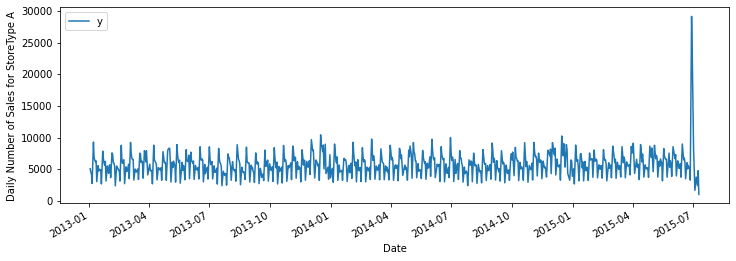

In [32]:
ax = sales_store_a.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales for StoreType A')
ax.set_xlabel('Date')
plt.show()


### Modelling Holidays
The StateHoliday variable in the dataset indicates a state holiday, at which all stores are normally closed. There are also school holidays in the dataset at which ceratin stores are also closing their doors.

In [33]:
# create holidays dataframe
state_datess = train_store[(train_store.StateHoliday == 'a') | (train_store.StateHoliday == 'b') & 
                          (train_store.StateHoliday == 'c')].loc[:, 'Date'].values
school_datess = train_store[train_store.SchoolHoliday == 1].loc[:, 'Date'].values

states = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_datess)})
schools = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_datess)})

holidays = pd.concat((states, schools))      
holidays.head()

,holiday,ds
0,state_holiday,2014-10-03
1,state_holiday,2013-10-03
2,state_holiday,2015-06-04
3,state_holiday,2014-06-19
4,state_holiday,2013-05-30


In [34]:
from fbprophet import Prophet
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.95, 
                   holidays = holidays)
my_model.fit(sales_store_a)

# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 6*7)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]#.tail(7)

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-02,5465.885114,2557.692645,8079.954391
1,2013-01-03,5535.285593,2833.931193,8134.280311
2,2013-01-04,5346.494031,2542.280356,8273.338290
3,2013-01-05,3106.096441,268.147101,5916.995865
4,2013-01-07,7074.705176,4136.572484,9825.529008
...,...,...,...,...
803,2015-08-17,7352.232392,4739.119783,10255.638548
804,2015-08-18,6252.583222,3621.208475,8919.440311
805,2015-08-19,5663.918728,2859.484135,8619.829376
806,2015-08-20,5751.890920,2876.944588,8606.755125


In [37]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

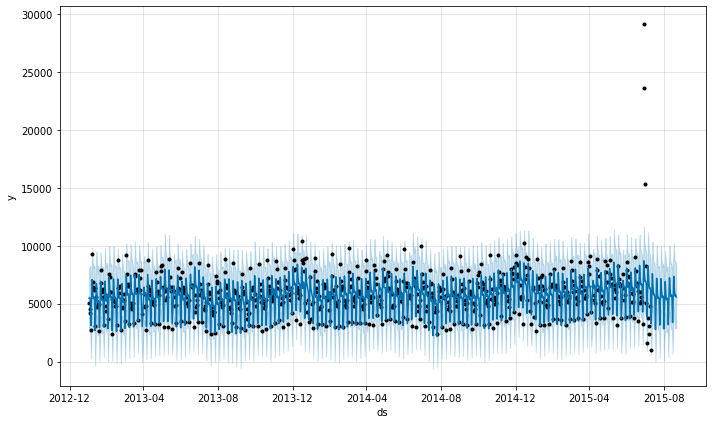

In [38]:
# visualizing predicions
my_model.plot(forecast);

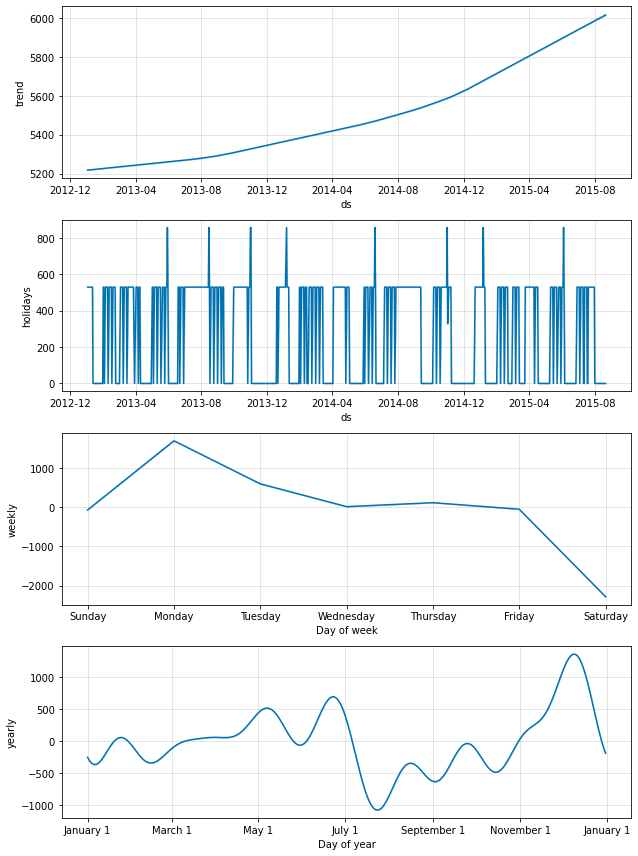

In [39]:
my_model.plot_components(forecast);

The first plot shows that the monthly sales of store number 292 `StoreType A` has been linearly increasing over time and the second shows the holiays gaps included in the model. The third plot highlights the fact that the weekly volume of last week sales peaks towards the Monday, while the forth plot shows that the most buzy season occurs during the Christmas holidays and july month.

`StoreType C`

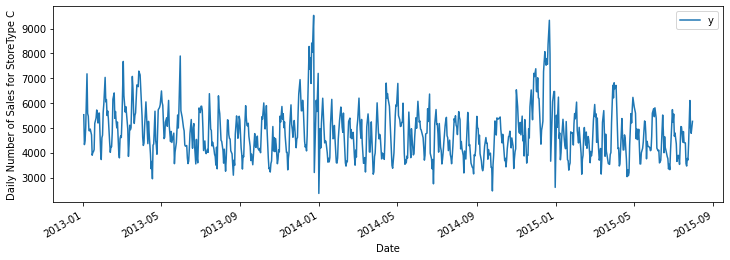

In [45]:
# sales for the store number 1 (StoreType C)
sales_store_c = train_store[train_store.Store == 1].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales_store_c = sales_store_c.sort_index(ascending = False)

# to datetime64
sales_store_c['Date'] = pd.DatetimeIndex(sales_store_c['Date'])

#renaming the columns
sales_store_c = sales_store_c.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})

ax = sales_store_c.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales for StoreType C')
ax.set_xlabel('Date')
plt.show()

`StoreType C` Hoiday modelling

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


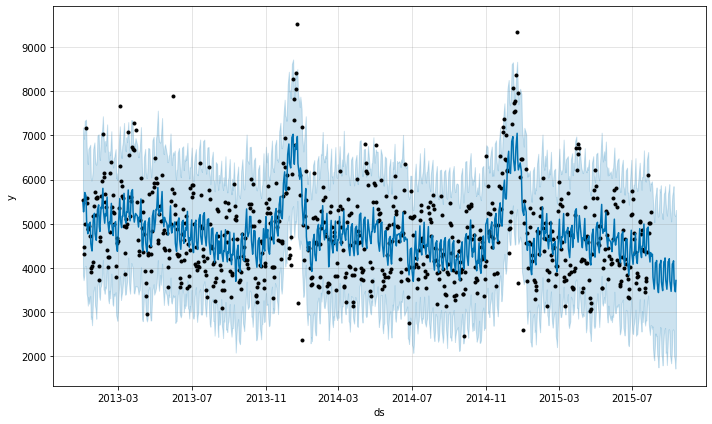

In [47]:
my_model = Prophet(interval_width = 0.95, 
                   holidays = holidays)
# modelling holidays
c_model = my_model.fit(sales_store_c)

# dataframe that extends into future 6 weeks 
future_dates_c = c_model.make_future_dataframe(periods = 6*7)

# predictions
forecast_c = c_model.predict(future_dates_c)

# preditions for last week
forecast_c[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]#.tail(7)

fc_c = forecast_c[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

# visualizing predicions
c_model.plot(forecast_c);

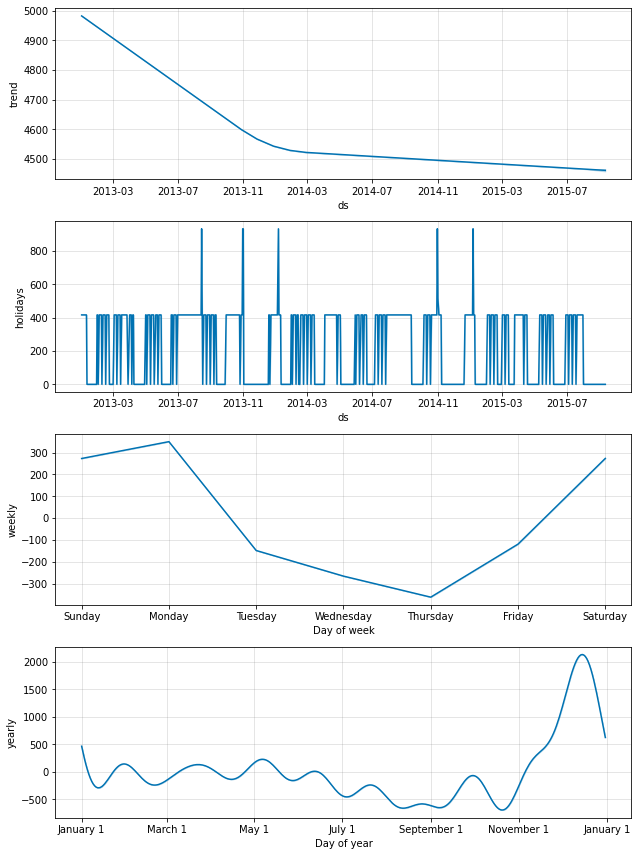

In [49]:
c_model.plot_components(forecast_c);

The first plot shows that the monthly sales of store number 1 `StoreType C` has been linearly decreasing over time and the second shows the holiays gaps included in the model. The third plot highlights the fact that the weekly volume of last week sales peaks towards the Monday of the next week, while the forth plot shows that the most buzy season occurs during the Christmas holidays.

`StoreType B`


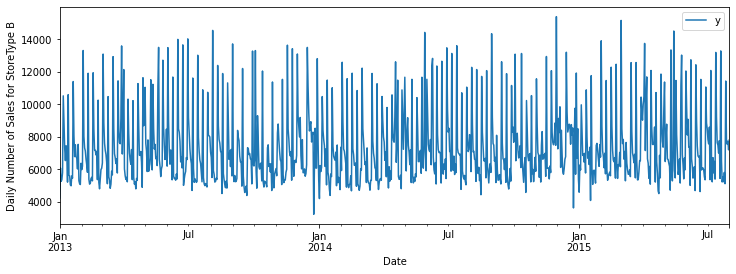

In [59]:
# sales for the store number 85 (StoreType B)
sales_store_b = train_store[train_store.Store == 85].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales_store_b = sales_store_b.sort_index(ascending = False)

# to datetime64
sales_store_b['Date'] = pd.DatetimeIndex(sales_store_b['Date'])

#renaming the columns
sales_store_b = sales_store_b.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})

ax = sales_store_b.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales for StoreType B')
ax.set_xlabel('Date')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


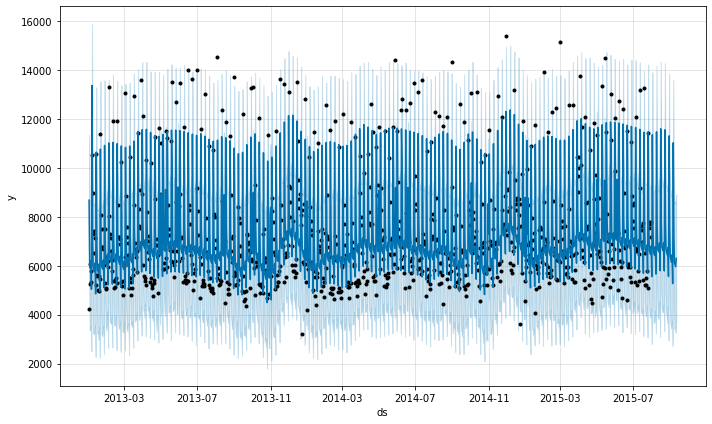

In [61]:
my_model = Prophet(interval_width = 0.95, 
                   holidays = holidays)
# modelling holidays
b_model = my_model.fit(sales_store_b)

# dataframe that extends into future 6 weeks 
future_dates_b = b_model.make_future_dataframe(periods = 6*7)

# predictions
forecast_b = b_model.predict(future_dates_b)

# preditions for last week
forecast_b[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]#.tail(7)

fc_b = forecast_b[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

# visualizing predicions
b_model.plot(forecast_b);

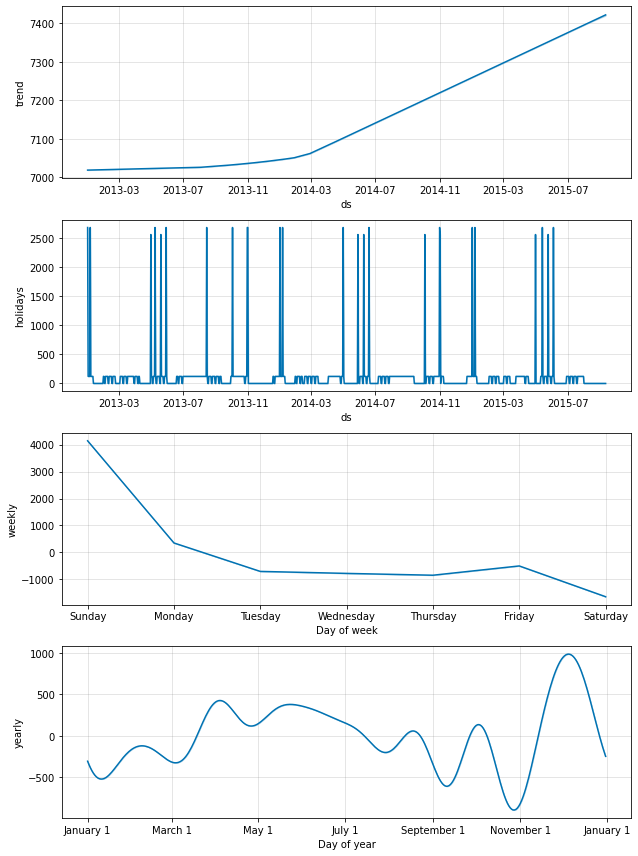

In [62]:
b_model.plot_components(forecast_b);

The first plot shows that the monthly sales of store number 85 `StoreType B` has been linearly increasing over time and the second shows the holiays gaps included in the model. The third plot highlights the fact that the weekly volume of last week sales peaks towards the Monday, while the forth plot shows that the most buzy season occurs during the Christmas holidays.

`StoreType D`

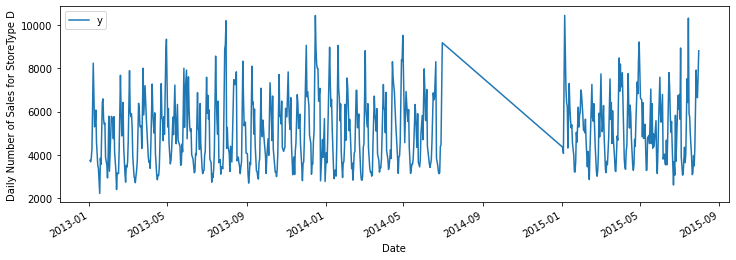

In [63]:
# sales for the store number 13 (StoreType D)
sales_store_d = train_store[train_store.Store == 13].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales_store_d = sales_store_d.sort_index(ascending = False)

# to datetime64
sales_store_d['Date'] = pd.DatetimeIndex(sales_store_d['Date'])

#renaming the columns
sales_store_d = sales_store_d.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})

ax = sales_store_d.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales for StoreType D')
ax.set_xlabel('Date')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


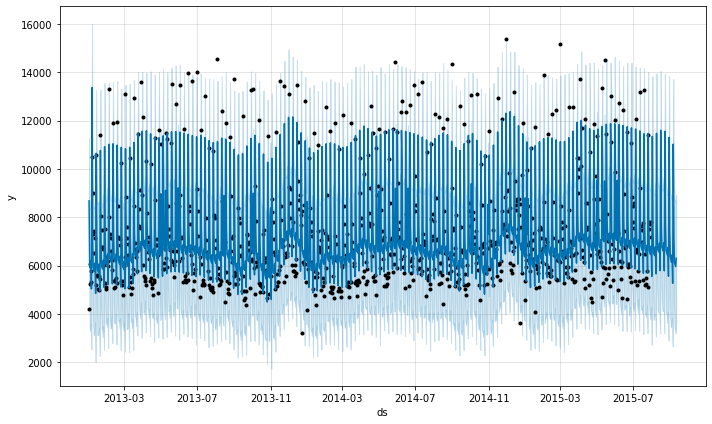

In [64]:
my_model = Prophet(interval_width = 0.95, 
                   holidays = holidays)
# modelling holidays
d_model = my_model.fit(sales_store_b)

# dataframe that extends into future 6 weeks 
future_dates_d = d_model.make_future_dataframe(periods = 6*7)

# predictions
forecast_d = d_model.predict(future_dates_d)

# preditions for last week
forecast_d[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]#.tail(7)

fc_d = forecast_d[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

# visualizing predicions
d_model.plot(forecast_d);

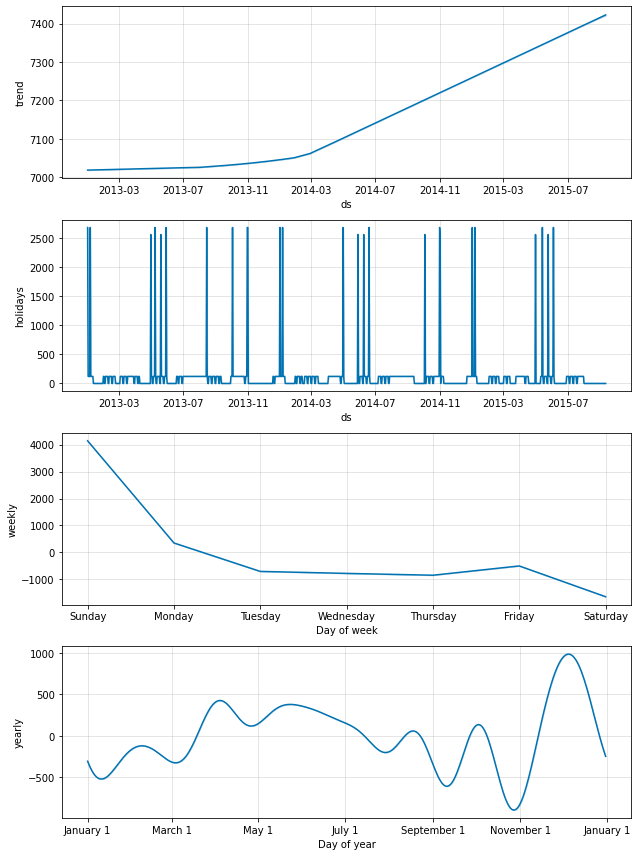

In [65]:
d_model.plot_components(forecast_d);

The first plot shows that the monthly sales of store number 13 StoreType D has been linearly increasing over time and the second shows the holiays gaps included in the model. The third plot highlights the fact that the weekly volume of last week sales peaks towards the Monday, while the forth plot shows that the most buzy season occurs during the Christmas holidays.